In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from models_fit_rmse import algoModel


In [2]:
diamonds = pd.read_csv('input/diamonds-datamad0120/diamonds_train.csv')
diamonds_num = pd.get_dummies(diamonds)
diamonds_num = diamonds_num.drop(columns=['id', 'x', 'y', 'z'])
diamonds_num.head()

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.78,61.5,58.0,3446,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.31,60.8,56.0,732,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.30,62.3,54.0,475,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.04,62.0,58.0,9552,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.65,61.4,55.0,1276,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
#gb1 = GradientBoostingRegressor(n_estimators= 4000, max_depth= 4, min_samples_split= 2).fit(X, y)

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=1)

In [4]:
predictors = ['carat', 'depth', 'table', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

In [ ]:
X = diamonds_num[predictors]
y = diamonds_num['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
neigh.fit(X_train, y_train)

In [ ]:
print(neigh.score(X_train, y_train))
print(neigh.score(X_test, y_test))

In [ ]:
print('RMSE', np.sqrt(mean_squared_error(y_test, neigh.predict(X_test))))

In [ ]:
y_pred = neigh.predict(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape

In [ ]:
#plt.scatter(y_pred, y_test)
sns.scatterplot(y_pred, y_test)
plt.xlabel("Predicted price")
plt.ylabel("Real price")

In [ ]:
regr.fit(X,y)

In [ ]:
diamonds_test = pd.read_csv('input/diamonds-datamad0120/diamonds_test.csv')
X_test = diamonds_test

In [ ]:
X_test = pd.get_dummies(X_test)
X_test = X_test.drop(columns=['id', 'x', 'y', 'z'])

In [ ]:
y_pred = regr.predict(X_test)
y_pred

In [ ]:
diamonds_new = pd.DataFrame()
diamonds_new['id'] = diamonds_test['id']

In [ ]:
diamonds_new['price'] = pd.Series(y_pred)

In [ ]:
diamonds_new.to_csv('diamonds_pred13', index=False)

# Testing the function

In [5]:
X = diamonds_num[predictors]
y = diamonds_num['price']

In [6]:
algorithms = { "rf_re1": RandomForestRegressor(n_estimators=100, max_depth=21, min_samples_leaf=2).fit(X, y),
              "rf_re2": RandomForestRegressor(n_estimators=85, max_depth=21, min_samples_leaf=3).fit(X, y),
              "gb1": GradientBoostingRegressor(n_estimators= 2500, max_depth= 4, min_samples_split= 2).fit(X, y),
              "gb2": GradientBoostingRegressor(n_estimators= 2000, max_depth= 4, min_samples_split= 2).fit(X, y),
              "regr1": AdaBoostRegressor(n_estimators=10).fit(X, y),
              "regr2": BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0).fit(X, y)
}

rf_re1
Score is  0.9937778467159152
RMSE is  312.2380768273875


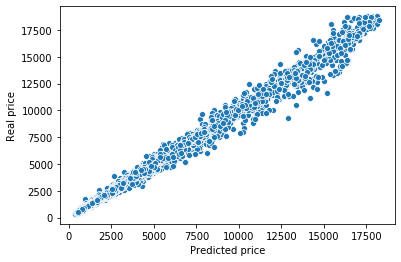

rf_re2
Score is  0.9913056844409859
RMSE is  369.09079128725307


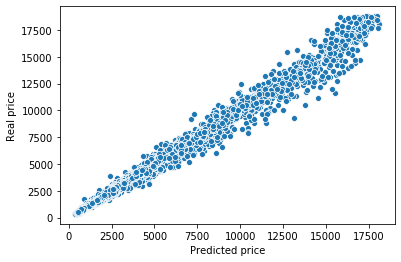

gb1
Score is  0.9910455576331427
RMSE is  374.57154573834066


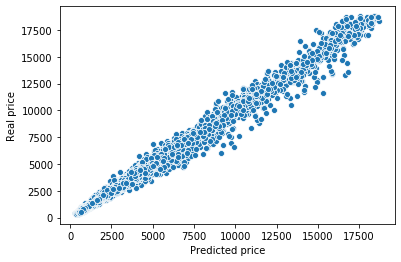

gb2
Score is  0.9903630380831836
RMSE is  388.584597049611


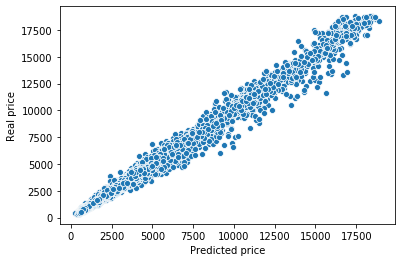

regr1
Score is  0.8814072011987933
RMSE is  1363.1532071624247


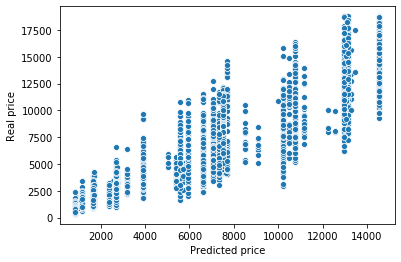

regr2
Score is  -0.1401954564824861
RMSE is  4226.736395110728


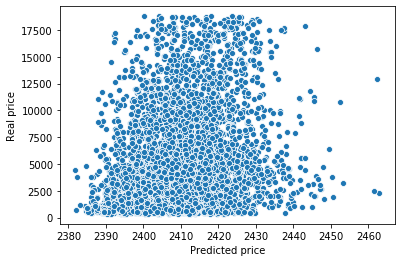

In [7]:
algoModel(algorithms, X, y)